### Etapa 1 - Importar bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile
tf.__version__

'2.1.0'

### Etapa 2 - Importar Modelos com pesos Pré-Treinados

In [2]:
# GUARDA ESSE NOME -> RESNET50
model = tf.keras.applications.ResNet50(weights = 'imagenet')

In [3]:
model.summary()
# Veja na primeira camada de entrada... os dados foram colocados como (x, 224,224,3)... ou seja,
#Quando você colocar imagens para que esse modelo analise, ele terá que ter o formato de 224 linhas,224colunas e RGB

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Etapa 3 - parte 1 - Fazer download do Zip contendo as imagens

### Etapa 3 - parte 2 - Extrair

In [4]:
path = '/home/miguel/Apps/Data_Science_Python_GIT/11_Deep_Learning_TensorFlow/05_Transferencia_Aprendizado/01_Gatos_Cachorros/transfer_learn.zip'
zip_object = zipfile.ZipFile(file = path,mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Etapa 3 - parte 3 - Como carregar a rede Neural com o modelo já pré-treinado

In [5]:
# Carregar uma imagem

In [6]:
sample_image = tf.keras.preprocessing.image.load_img(r'./Transfer Learning Data/bicycle.png',
                                                    target_size=(224,224)
                                                    #RESPEITAR O TAMANHO
                                                    # QUE FOI TREINADO
                                                    )

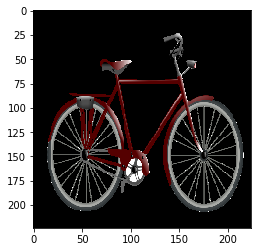

In [7]:
plt.imshow(sample_image)

In [8]:
type(sample_image)
# Está como PIL, preciamos transformar em Array

PIL.Image.Image

In [9]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [10]:
type(sample_image)

numpy.ndarray

In [11]:
sample_image.shape

(224, 224, 3)

In [12]:
# ainda esse não é o formato que o TF querer...

In [13]:
sample_image = np.expand_dims(sample_image,axis=0)

In [14]:
sample_image.shape
#Agora está no formato que o TF utiliza
# (N de img, linhas, colunas, RGB)

(1, 224, 224, 3)

In [15]:
sample_image.max(),sample_image.min() # 0 - 255

(255.0, 0.0)

In [16]:
# No treino do modelo eles não utilizaram valores entre 0 e 1

# Resnet50 utilizou outra escala

# Portanto, precisamos Normalizar os valores

In [17]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

# A Própria Resnet deixa na estutura que a rede
# foi treinada... normalizando do jeito deles já

In [18]:
sample_image.max(),sample_image.min()
#Perceba que não utilizaram a escala de 0 e 1...

# Em algumas arquiteturas não é usado 0 e 1

(151.061, -123.68)

In [19]:
predictions = model.predict(sample_image)

In [20]:
tf.keras.applications.resnet50.decode_predictions(predictions, top = 5)

[[('n02835271', 'bicycle-built-for-two', 0.6329613),
  ('n03792782', 'mountain_bike', 0.053755857),
  ('n04482393', 'tricycle', 0.04975804),
  ('n03599486', 'jinrikisha', 0.015690275),
  ('n04507155', 'umbrella', 0.010513368)]]

In [21]:
def testar_img(path,top):
    sample_image = tf.keras.preprocessing.image.load_img(r'./Transfer Learning Data/'+str(path),
                                                    target_size=(224,224))
    sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
    sample_image = np.expand_dims(sample_image,axis=0)
    sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
    predictions = model.predict(sample_image)
    return tf.keras.applications.resnet50.decode_predictions(predictions, top = top)

In [22]:
testar_img('Lion.jpg',5)

[[('n02129165', 'lion', 0.99799216),
  ('n02480495', 'orangutan', 0.00044723574),
  ('n02130308', 'cheetah', 0.00021210345),
  ('n02129604', 'tiger', 0.00018189393),
  ('n02128925', 'jaguar', 0.00014609931)]]

In [23]:
testar_img('watch.jpg',5)

[[('n04328186', 'stopwatch', 0.993948),
  ('n02708093', 'analog_clock', 0.0046884953),
  ('n03197337', 'digital_watch', 0.00074670603),
  ('n04548280', 'wall_clock', 0.00012209467),
  ('n02794156', 'barometer', 7.71396e-05)]]

In [24]:
testar_img('leao.jpg',10)

[[('n02114855', 'coyote', 0.30066645),
  ('n02114367', 'timber_wolf', 0.285516),
  ('n02115641', 'dingo', 0.06627575),
  ('n02437312', 'Arabian_camel', 0.06052481),
  ('n02119022', 'red_fox', 0.03276185),
  ('n02115913', 'dhole', 0.030199826),
  ('n02114712', 'red_wolf', 0.019381342),
  ('n02138441', 'meerkat', 0.016304282),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.01419681),
  ('n02120505', 'grey_fox', 0.013399711)]]

In [25]:
testar_img('leao1.jpg',2)

[[('n02129165', 'lion', 0.9238157), ('n02397096', 'warthog', 0.02003248)]]

In [26]:
testar_img('leao2.jpg',2)

[[('n02129165', 'lion', 0.6632631), ('n02129604', 'tiger', 0.047332272)]]

In [27]:
testar_img('filhote_leao.jpg',2)

[[('n02129165', 'lion', 0.905349), ('n02441942', 'weasel', 0.020890206)]]

In [28]:
testar_img('rosa.jpg',10)

[[('n04522168', 'vase', 0.86182815),
  ('n03916031', 'perfume', 0.041350078),
  ('n03950228', 'pitcher', 0.012717585),
  ('n03443371', 'goblet', 0.009878976),
  ('n07892512', 'red_wine', 0.009789177),
  ('n03991062', 'pot', 0.006329015),
  ('n04591713', 'wine_bottle', 0.006282784),
  ('n04476259', 'tray', 0.0047718016),
  ('n04560804', 'water_jug', 0.0033443705),
  ('n03062245', 'cocktail_shaker', 0.002950202)]]

In [29]:
testar_img('rosa1.jpg',5)

[[('n02808304', 'bath_towel', 0.121477075),
  ('n04522168', 'vase', 0.09515197),
  ('n03916031', 'perfume', 0.08734592),
  ('n03485794', 'handkerchief', 0.05726365),
  ('n04476259', 'tray', 0.05335745)]]

In [30]:
testar_img('duck.jpg',5)

[[('n01855672', 'goose', 0.90868723),
  ('n01847000', 'drake', 0.041575186),
  ('n02058221', 'albatross', 0.029963596),
  ('n01514859', 'hen', 0.005771925),
  ('n02017213', 'European_gallinule', 0.0013423065)]]

In [31]:
testar_img('moto.jpg',5)

[[('n03791053', 'motor_scooter', 0.25180238),
  ('n03127747', 'crash_helmet', 0.19940363),
  ('n03785016', 'moped', 0.106179856),
  ('n01728920', 'ringneck_snake', 0.034301862),
  ('n03792782', 'mountain_bike', 0.024989719)]]

### Etapa 4 - Transfer Learning e Reuso do Modelo

In [32]:
base_model = tf.keras.applications.ResNet50(
    weights = 'imagenet',
    include_top = False,# Ele não carrega as camadas
    # somente as convolutions Layers
    # (que apresentam características GERAIS)    
)

In [33]:
base_model.summary()
# Perceba que ele não invocou a última camada 
# DENSA

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [34]:
x = base_model.output
x

<tf.Tensor 'conv5_block3_out_1/Identity:0' shape=(None, None, None, 2048) dtype=float32>

In [35]:
# Global Average Pooling 2D -> Em vez de usar o 
# MAxpooling (pega o maior), você pega a média

x = tf.keras.layers.GlobalAveragePooling2D()(x)
#OBS: Estamos usando uma sintaxe diferente de
# quando trabalhavamos com modelo SEQUENCIAL... agora
# o (x) fica do lado de fora com parenteses...
#assim que fazemos as ligações neste caso

In [36]:
x = tf.keras.layers.Dense(units = 1024,
                         activation='relu'
                         )(x)
x = tf.keras.layers.Dense(units = 1024,
                         activation='relu'
                         )(x)
x = tf.keras.layers.Dense(units = 1024,
                         activation='relu'
                         )(x)
x = tf.keras.layers.Dense(units = 512,
                         activation='relu'
                         )(x)

preds = tf.keras.layers.Dense(units = 2,#Gatos e Cachorros
                         activation='softmax'#ou sigmoid
                         )(x)

In [37]:
# Conectar as Camadas...

model = tf.keras.models.Model(
    inputs = base_model.input,
    outputs = preds,
)

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [39]:
# Só queremos fazer o treinamento das Camadas novas que adicionamos, o resto antes não...
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [40]:
# Da camada 175 pra frente é para fazer o treinamento

In [41]:
#CONGELAR CAMADAs

for layer in model.layers[:175]:
    layer.trainable = False
# Ou seja, pega todas até 174 e não treina ela"

In [42]:
for layer in model.layers[175:]:
    layer.trainable = True
# Ou seja, pega todas até 174 e não treina ela"

### Etapa 5 - Abrir as Imagens de Gatos e Cachorros

<font color ='red'> Não deu certo, pois não temos eixo Y com os valores que queremos</font>

In [43]:
"""import os
local = os.getcwd()
import random"""

'import os\nlocal = os.getcwd()\nimport random'

In [44]:
pwd

'/home/miguel/Apps/Data_Science_Python_GIT/11_Deep_Learning_TensorFlow/05_Transferencia_Aprendizado/01_Gatos_Cachorros'

In [45]:
"""def armazenar(nome_pasta, v = None):
    #Dica: Vetor vem por padrão Vazio, mas pode colocar um vetor já preenchido 
    
    if v != None:
        vetor = v
    else:
        vetor =[]
    
    
    os.chdir("./Transfer Learning Data/train/"+str(nome_pasta))#Vai para pasta
    
    for img in  os.listdir('.'):
        #Abir img
        open_img = tf.keras.preprocessing.image.load_img(r'./'+str(img),
                                                    target_size=(224,224))
        
        #Transformar em Array
        img_to_array = tf.keras.preprocessing.image.img_to_array(open_img)
        #print(img_to_array.shape)
        
        #Normalizar de acordo com resnet50
        img_resnet50 = tf.keras.applications.resnet50.preprocess_input(img_to_array)
        
        #Adicionar ao vetor
        vetor.append(img_resnet50)
        
    random.shuffle(vetor)#embaralhar vetor
    os.chdir(local)#Retorna para pasta local
    
    return vetor"""
    

'def armazenar(nome_pasta, v = None):\n    #Dica: Vetor vem por padrão Vazio, mas pode colocar um vetor já preenchido \n    \n    if v != None:\n        vetor = v\n    else:\n        vetor =[]\n    \n    \n    os.chdir("./Transfer Learning Data/train/"+str(nome_pasta))#Vai para pasta\n    \n    for img in  os.listdir(\'.\'):\n        #Abir img\n        open_img = tf.keras.preprocessing.image.load_img(r\'./\'+str(img),\n                                                    target_size=(224,224))\n        \n        #Transformar em Array\n        img_to_array = tf.keras.preprocessing.image.img_to_array(open_img)\n        #print(img_to_array.shape)\n        \n        #Normalizar de acordo com resnet50\n        img_resnet50 = tf.keras.applications.resnet50.preprocess_input(img_to_array)\n        \n        #Adicionar ao vetor\n        vetor.append(img_resnet50)\n        \n    random.shuffle(vetor)#embaralhar vetor\n    os.chdir(local)#Retorna para pasta local\n    \n    return vetor'

In [46]:
"""x = armazenar('dogs')
len(x)"""

"x = armazenar('dogs')\nlen(x)"

In [47]:
"""x = armazenar('cats',x)
len(x)"""

"x = armazenar('cats',x)\nlen(x)"

In [48]:
"""x = np.array(x)
x.shape #OK"""

'x = np.array(x)\nx.shape #OK'

### Etapa 5 - Abrir as Imagens de Gatos e Cachorros - DataGenerator



In [49]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function= tf.keras.applications.resnet50.preprocess_input
)

In [50]:
train_generator = train_datagen.flow_from_directory(
    '/home/miguel/Apps/Data_Science_Python_GIT/11_Deep_Learning_TensorFlow/05_Transferencia_Aprendizado/01_Gatos_Cachorros/Transfer Learning Data/train',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 202 images belonging to 2 classes.


### Etapa 6 - Iniciar o Treinamento

In [51]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit_generator(train_generator,
                             epochs = 6)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 7 steps
Epoch 1/6
7/7 [==============================] - 32s 5s/step - loss: 1.4739 - accuracy: 0.6238
Epoch 2/6
7/7 [==============================] - 28s 4s/step - loss: 0.1037 - accuracy: 0.9653
Epoch 3/6
7/7 [==============================] - 29s 4s/step - loss: 0.1845 - accuracy: 0.9505
Epoch 4/6
7/7 [==============================] - 30s 4s/step - loss: 0.4281 - accuracy: 0.8762
Epoch 5/6
7/7 [==============================] - 27s 4s/step - loss: 0.0931 - accuracy: 0.9802
Epoch 6/6
7/7 [==============================] - 27s 4s/step - loss: 0.0271 - accuracy: 0.9950


### Avaliar Modelo

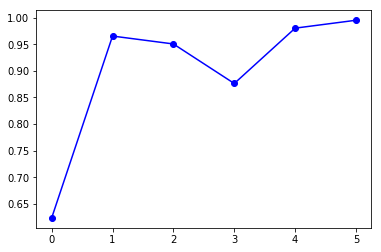

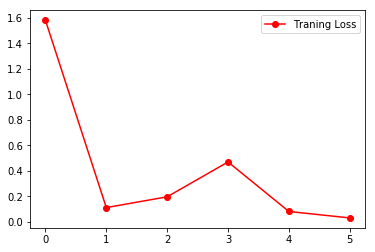

In [53]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc,'-ob',label = 'Training Accuracy')
plt.figure()
plt.plot(loss,'-or', label = 'Traning Loss')

plt.legend()


### Predições com imagens retirada do google

In [66]:
def predicoes(path):
    #Abrir IMG
    sample_image = tf.keras.preprocessing.image.load_img(r'./Transfer Learning Data/'+str(path),
                                                    target_size=(224,224))
    plt.imshow(sample_image)
    #Img to Array
    sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
    #Colocar no formado (1,224,224,3)
    sample_image = np.expand_dims(sample_image,axis=0)
    #Normalizar de acordo com o Resnet50
    sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
    #prever
    predictions = model.predict(sample_image)
    return predictions

array([[3.350493e-05, 9.999665e-01]], dtype=float32)

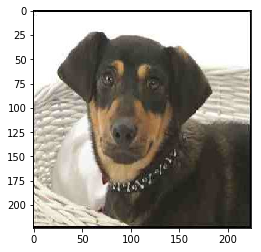

In [67]:
predicoes('dog.jpg')

array([[9.999498e-01, 5.015764e-05]], dtype=float32)

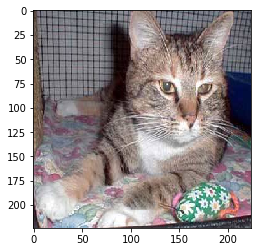

In [68]:
predicoes('gato.jpg')

array([[0.20569986, 0.7943001 ]], dtype=float32)

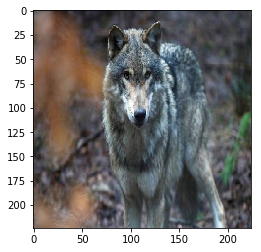

In [69]:
predicoes('lobo.jpg') # ele reconheceu 79% cachorro

array([[0.0070206 , 0.99297947]], dtype=float32)

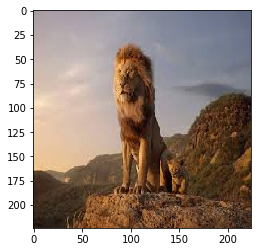

In [70]:
predicoes('leao.jpg') # Entendeu 99% cachorro

array([[0.6350102 , 0.36498976]], dtype=float32)

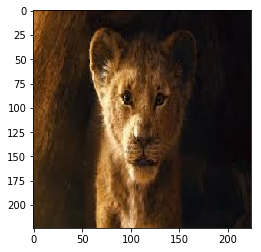

In [72]:
predicoes('filhote_leao.jpg') # Entendeu 63% gato

array([[0.64654875, 0.35345128]], dtype=float32)

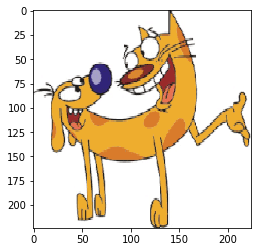

In [73]:
predicoes('catdog.png')